In [2]:
import pandas as pd
import numpy as np

import os
import sys

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras import layers, regularizers, models
from keras.models import Sequential
from keras.layers import *
from keras.regularizers import l2, l1, l1_l2
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
data_path = '/kaggle/input/ravdess1/'

In [4]:
train_features_df = pd.read_csv(data_path + 'train_dataset_augmented.csv')
test_features_df = pd.read_csv(data_path + 'test_dataset_augmented.csv')

In [5]:
X_train = train_features_df.iloc[:, :-1]
y_train = train_features_df.iloc[:, -1:]

X_test = test_features_df.iloc[:, :-1]
y_test = test_features_df.iloc[:, -1:]

In [6]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.transform(np.array(y_test).reshape(-1,1)).toarray()

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [9]:
x_train_rnn, x_valid_rnn, y_train_rnn, y_valid_rnn = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [10]:
def LSTM_model():
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
    model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
    model.add(LSTM(128, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(8))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

    return model

In [11]:
RNN_classifier = LSTM_model()
hist =  RNN_classifier.fit(x_train_rnn, y_train_rnn, batch_size=256, epochs=500, validation_data=(x_valid_rnn, y_valid_rnn))

2022-12-27 01:50:20.325975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:50:20.326954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:50:20.497876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:50:20.498788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:50:20.499633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/500


2022-12-27 01:50:31.028943: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12/12 [==============================] - 11s 197ms/step - loss: 5.2026 - accuracy: 0.1898 - val_loss: 2.0314 - val_accuracy: 0.1442
Epoch 2/500
12/12 [==============================] - 1s 106ms/step - loss: 2.0739 - accuracy: 0.2947 - val_loss: 2.0453 - val_accuracy: 0.1712
Epoch 3/500
12/12 [==============================] - 1s 104ms/step - loss: 1.8632 - accuracy: 0.3015 - val_loss: 2.0637 - val_accuracy: 0.1558
Epoch 4/500
12/12 [==============================] - 1s 107ms/step - loss: 2.0628 - accuracy: 0.2791 - val_loss: 2.0363 - val_accuracy: 0.1615
Epoch 5/500
12/12 [==============================] - 1s 106ms/step - loss: 1.7111 - accuracy: 0.3402 - val_loss: 2.0248 - val_accuracy: 0.1769
Epoch 6/500
12/12 [==============================] - 1s 109ms/step - loss: 1.9362 - accuracy: 0.2995 - val_loss: 2.0315 - val_accuracy: 0.1538
Epoch 7/500
12/12 [==============================] - 1s 107ms/step - loss: 1.7676 - accuracy: 0.3480 - val_loss: 2.0298 - val_accuracy: 0.1538
Epoch 8/50

9/9 [==============================] - 0s 13ms/step - loss: 4.8323 - accuracy: 0.6456
Accuracy of our model on test data :  64.56140279769897 %


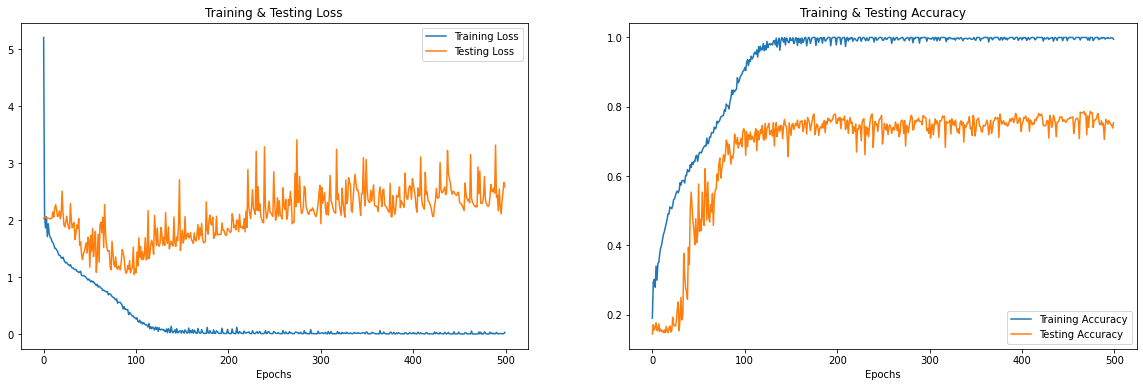

In [12]:
print("Accuracy of our model on test data : " , RNN_classifier.evaluate(X_test, y_test)[1]*100 , "%")

epochs = [i for i in range(500)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [13]:
pred_test = RNN_classifier.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [14]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,calm,calm
2,calm,calm
3,fear,fear
4,calm,calm
5,surprise,surprise
6,angry,angry
7,fear,fear
8,sad,sad
9,happy,fear


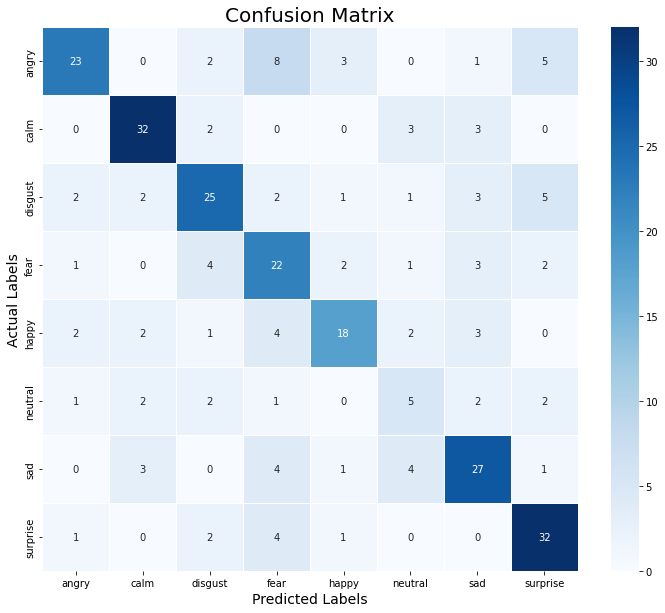

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.55      0.64        42
        calm       0.78      0.80      0.79        40
     disgust       0.66      0.61      0.63        41
        fear       0.49      0.63      0.55        35
       happy       0.69      0.56      0.62        32
     neutral       0.31      0.33      0.32        15
         sad       0.64      0.68      0.66        40
    surprise       0.68      0.80      0.74        40

    accuracy                           0.65       285
   macro avg       0.63      0.62      0.62       285
weighted avg       0.66      0.65      0.65       285

